# Experiment
Testing displacement estimation accuracy on edges vs on interiors of features in images.

### Goal:
Show experimentally that points on the interior of features provide a worse displacement vector estimation.

In [3]:
using LAP_julia, PyPlot

┌ Info: Precompiling LAP_julia [797d5b5c-2e9a-429f-9c9f-727808915e33]
└ @ Base loading.jl:1273


LAP_julia succesfully loaded!


## generate images and displacement

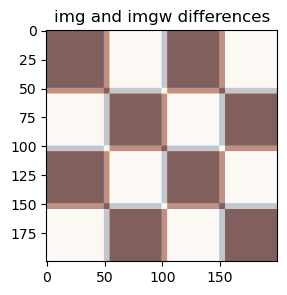

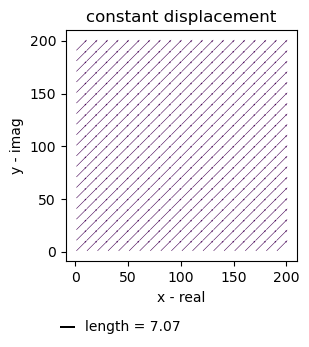

test


PyObject <matplotlib.quiver.Quiver object at 0x115242b50>

In [4]:
# get a constant shift and two images
img = gen_chess()
flow = 5 .* ones(size(img)) .+ 5 .* ones(size(img)) .* im
imgw = warp_img(img, -real(flow), -imag(flow))

# show image dif and shift
imgoverlay(img, imgw, fig=figure(figsize=(3,3)), figtitle="img and imgw differences", ret=:pyobject)
showflow(flow, fig=figure(figsize=(3,3)), figtitle="constant displacement", ret=:pyobject)

## estimation using single LAP

In [5]:
u_est = single_lap(img, imgw, 10, [21,21]);

# show the NaN location
nan_img = map(x -> isnan(x) ? 1 : 0, u_est);
# imgshow(nan_img, fig=figure(figsize=(3,3)), figtitle="nans here", ret=:pyobject)

## show results
the greener the closer the estimation to the real flow

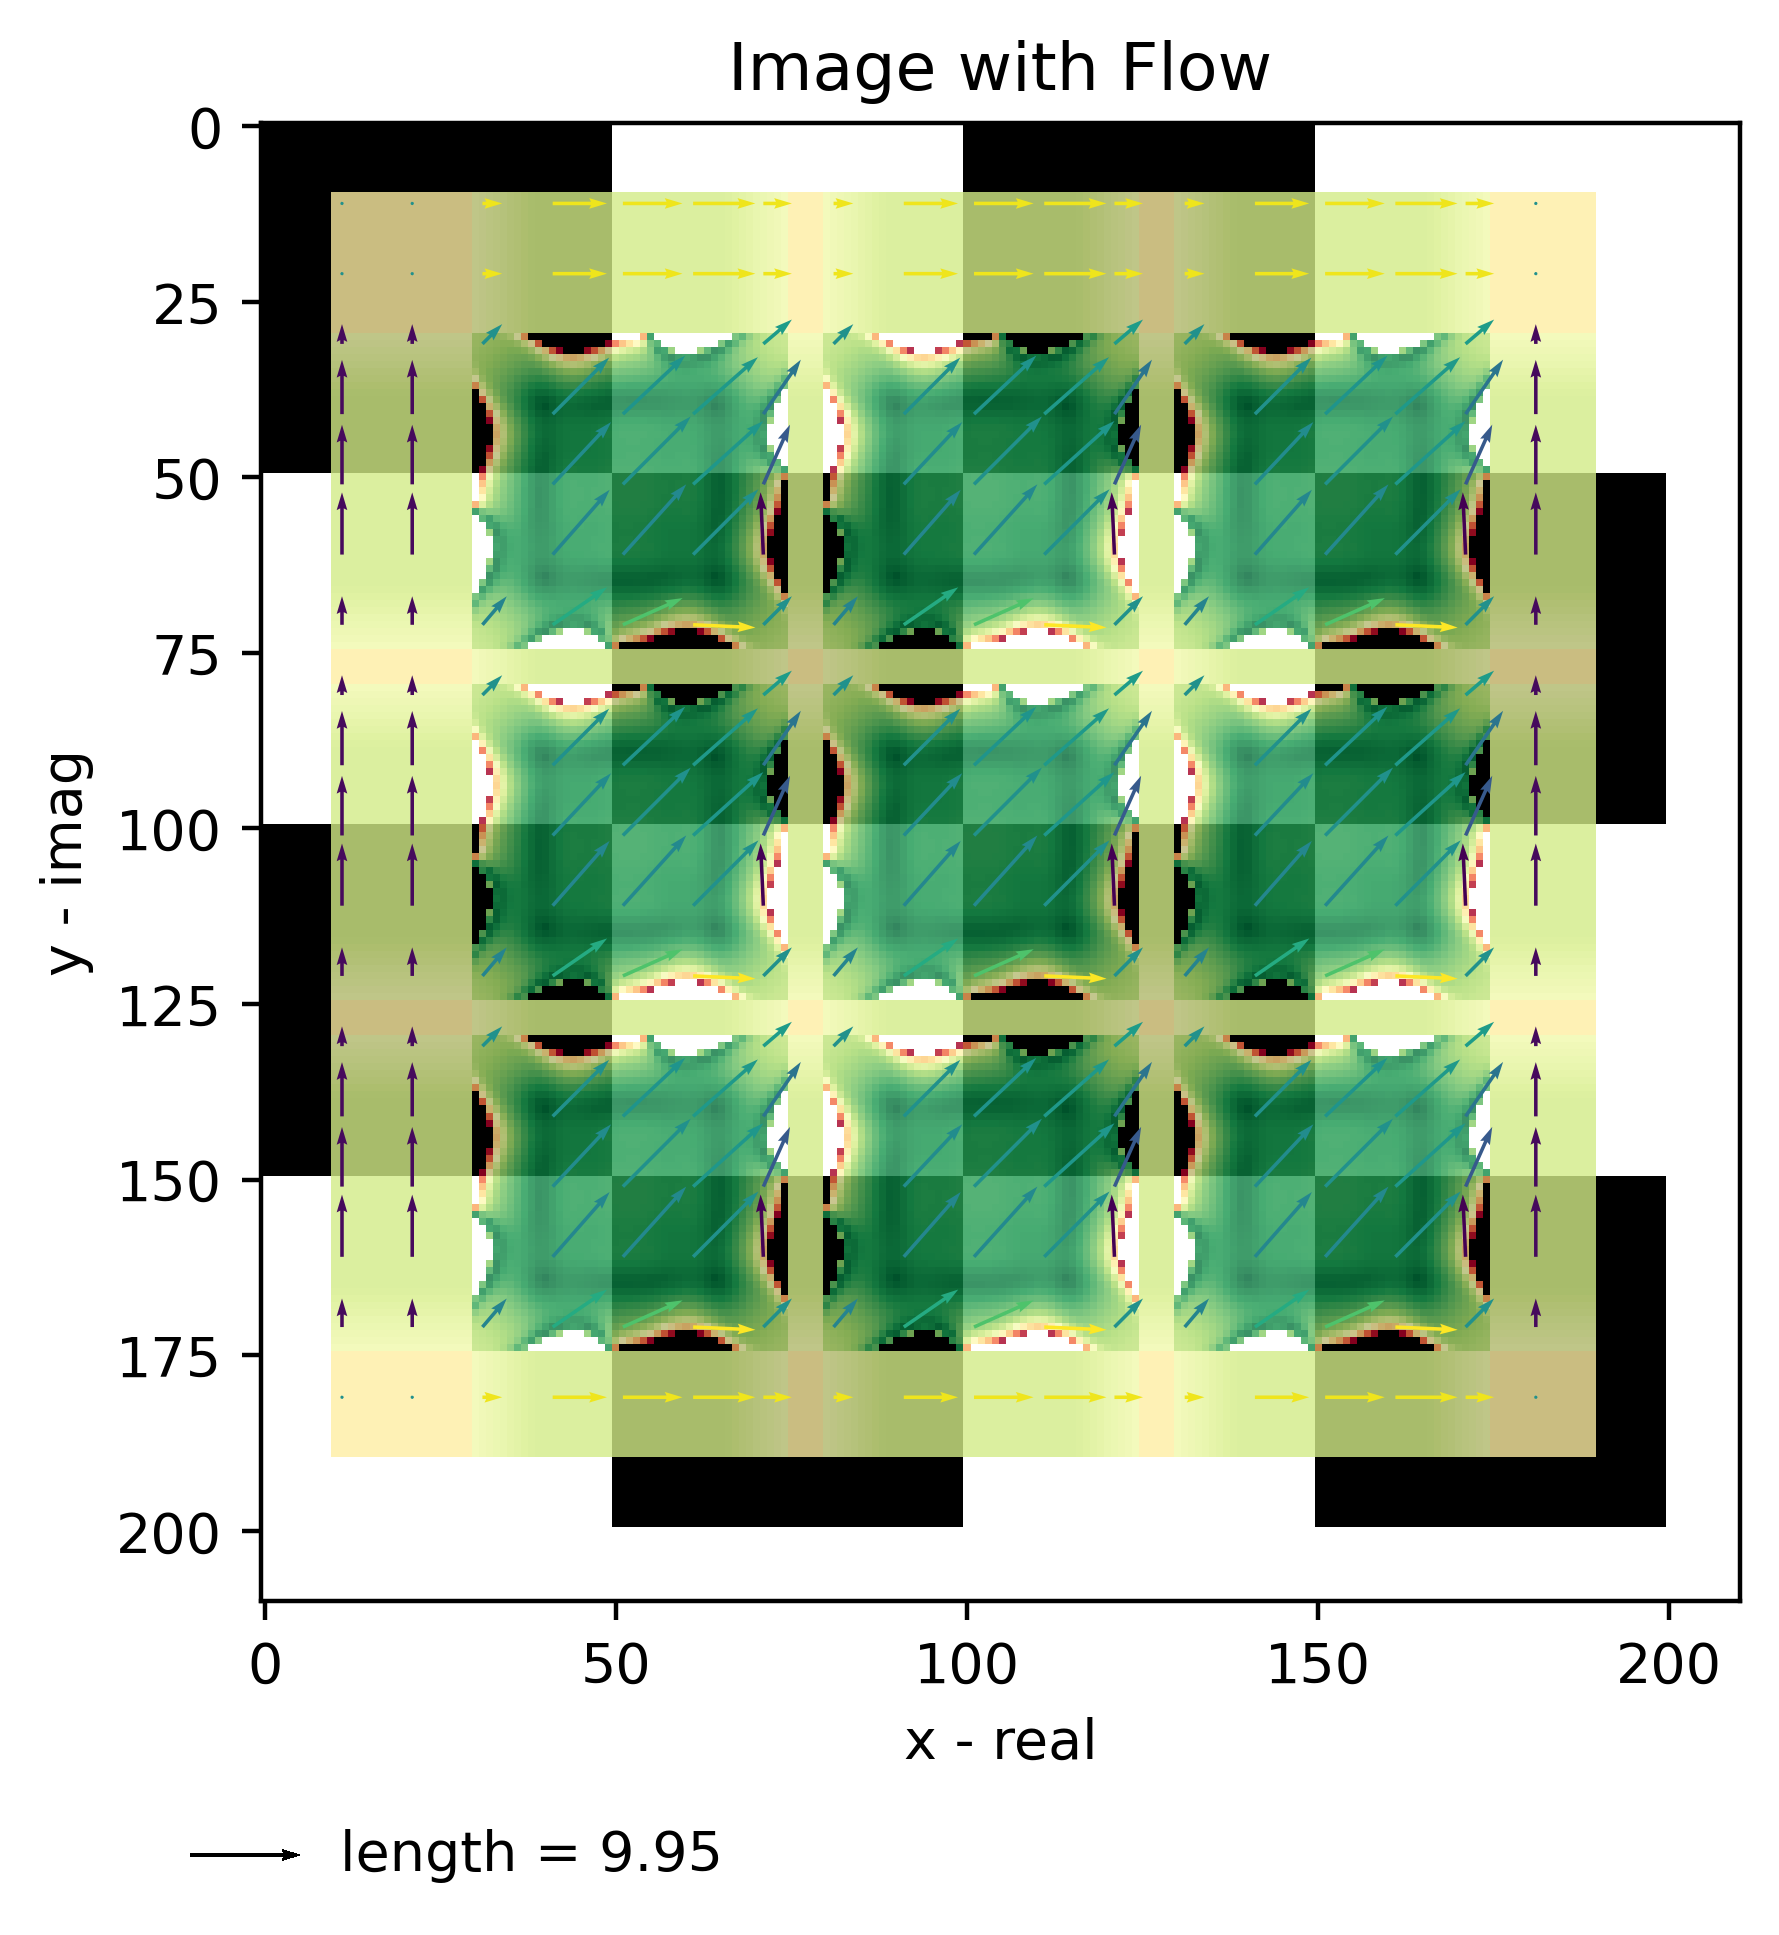

test


PyObject <matplotlib.image.AxesImage object at 0x155f3aa90>

In [6]:
imgshowflow(img, u_est, ret=:pyobject)
 

function error_percentage(estim, truth)
    error = abs(estim - truth)
    return error/truth
end

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(u_est, flow))
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.8)


### Create constant flow and lena images

In [7]:
using TestImages
lena = Float32.(testimage("lena_gray"))
lena_flow = 5 .* ones(size(lena)) .+ 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))

# show image dif and shift
# imgoverlay(lena, lenaw, fig=figure(figsize=(3,3)), figtitle="lena and lenaw differences", ret=:pyobject);
# showflow(lena_flow, fig=figure(figsize=(3,3)), figtitle="constant displacement", ret=:pyobject)

lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

  likely near /Users/MrTrololord/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/MrTrololord/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/MrTrololord/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/MrTrololord/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/MrTrololord/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
in read_and_release_imgsrc at /Users/MrTrololord/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl
  likely near /Users/MrTrololord/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
in read_and_release_imgsrc at /Users/MrTrololord/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl


test


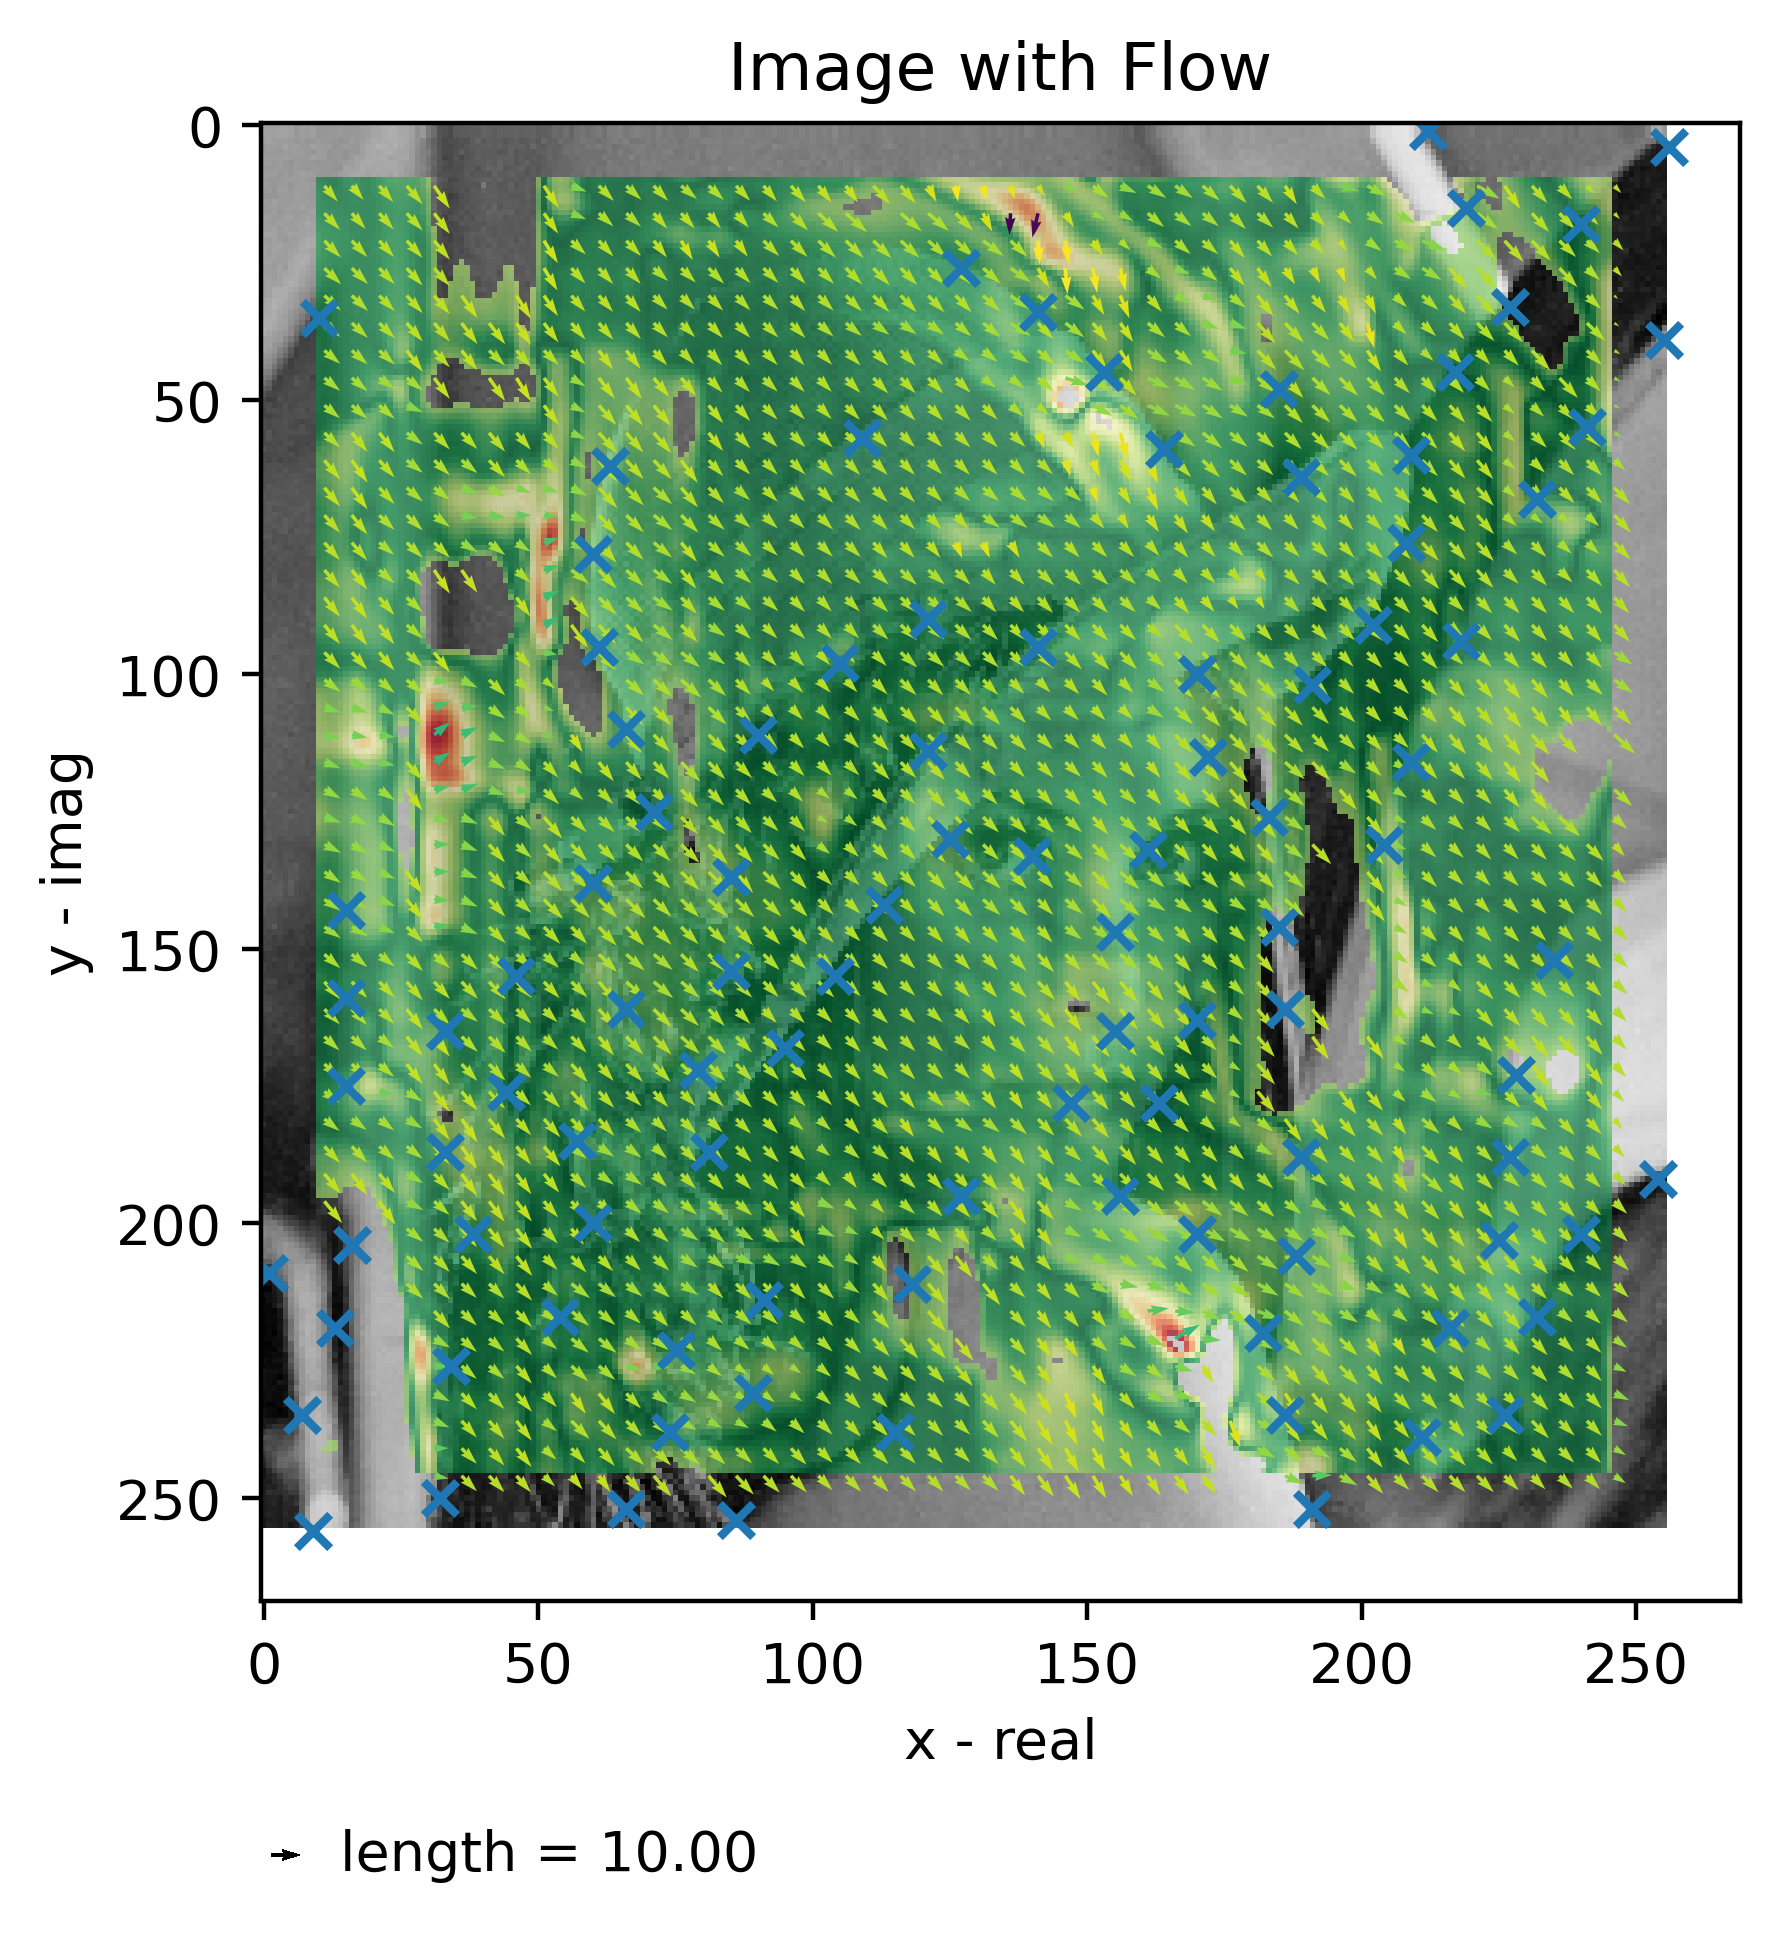

PyObject <matplotlib.collections.PathCollection object at 0x1544afb50>

In [17]:
imgshowflow(lena, lena_u_est, skip_count=4, ret=:pyobject)
 

function error_percentage(estim, truth)
    error = abs(estim - truth)
    return error/truth
end

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.7)

inds = find_edge_points(lena, spacing = 15, number=100)
pos_x = [ind[1] for ind in inds]
pos_y = [ind[2] for ind in inds]

scatter(pos_y, pos_x, marker = :x)


In [ ]:
println(mean(filter(!isnan, good_estimation)))
println(maximum(filter(!isnan, good_estimation)))
println(minimum(filter(!isnan, good_estimation)))

imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.7)

inds = find_edge_points(lena, spacing = 15, number=50)
addpoints(inds)

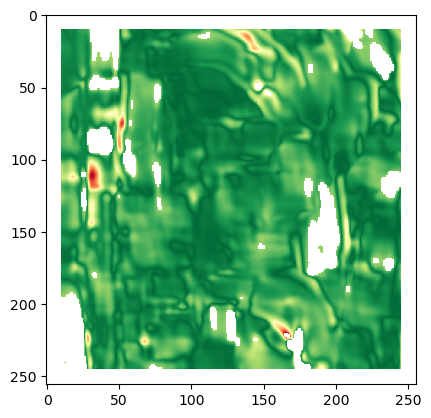

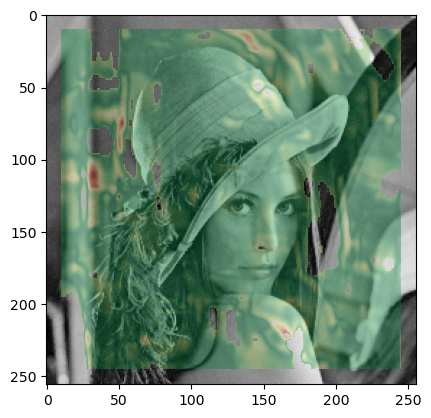

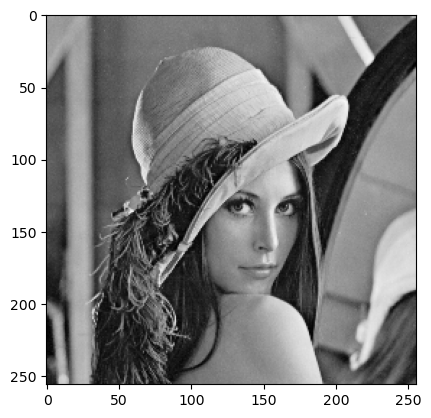

PyObject <matplotlib.image.AxesImage object at 0x1585503d0>

In [22]:
# different flow


lena_flow = 5 .* ones(size(lena)) .- 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))

lena_u_est = single_lap(lena, lenaw, 10, [21,21]);
#imgshowflow(lena, lena_u_est, skip_count=4, ret=:pyobject)
#imgshow(lena, ret=:pyobject)
#imshow(lena, cmap=:gray, alpha = 0.5)

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 1)

figure()
imshow(lena, cmap=:gray, alpha = 1)

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.4)

figure()
imshow(lena, cmap=:gray, alpha = 1)

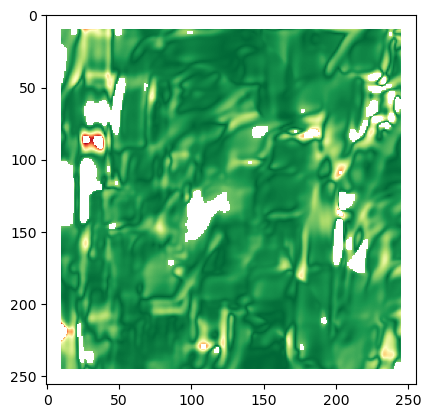

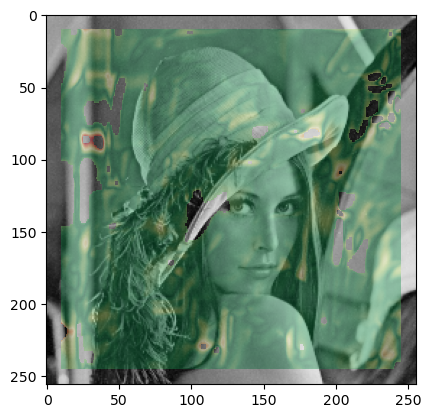

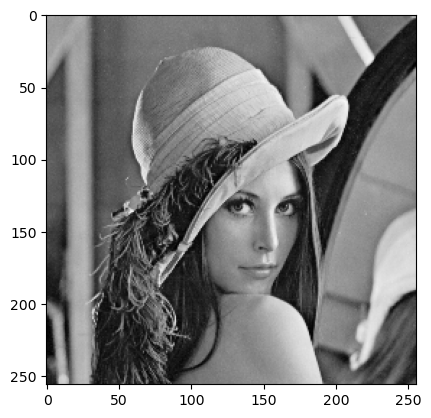

PyObject <matplotlib.image.AxesImage object at 0x15878aad0>

In [24]:
# different flow


lena_flow = -5 .* ones(size(lena)) .- 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))

lena_u_est = single_lap(lena, lenaw, 10, [21,21]);
#imgshowflow(lena, lena_u_est, skip_count=4, ret=:pyobject)
#imgshow(lena, ret=:pyobject)
#imshow(lena, cmap=:gray, alpha = 0.5)

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

imshow(good_estimation, cmap = :RdYlGn_r, alpha = 1)

figure()
imshow(lena, cmap=:gray, alpha = 1)
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.4)

figure()
imshow(lena, cmap=:gray, alpha = 1)

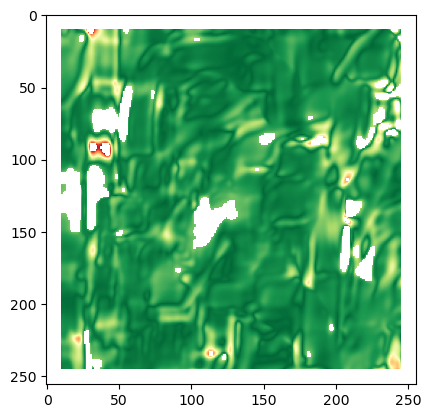

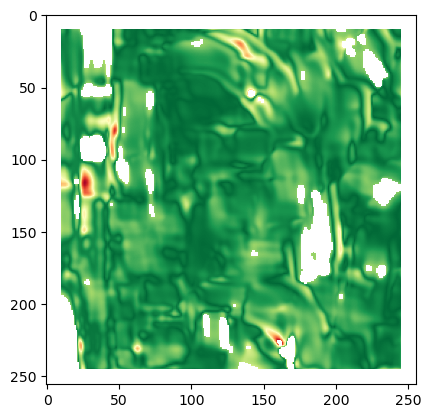

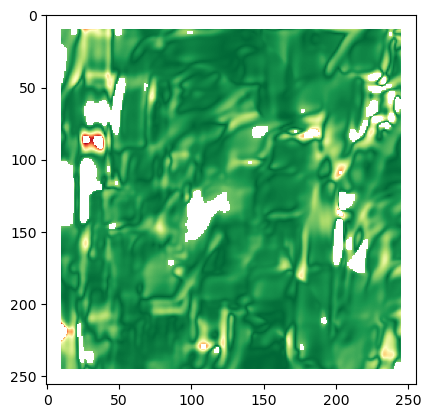

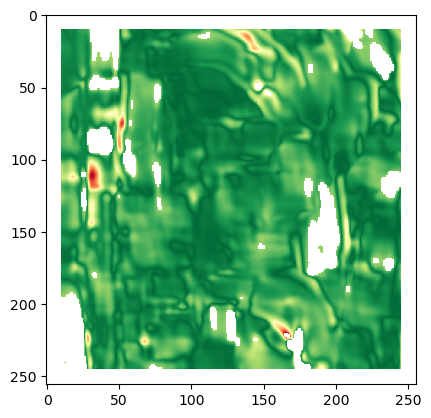

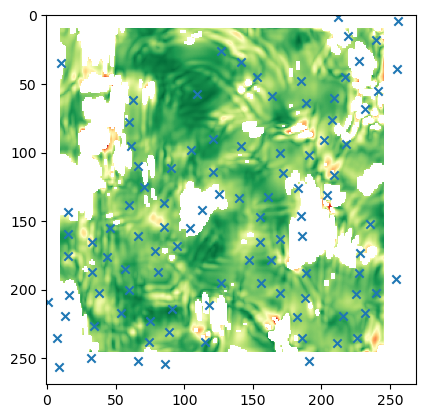

PyObject <matplotlib.collections.PathCollection object at 0x169e22f10>

In [28]:
# 1 
lena_flow = 5 .* ones(size(lena)) .+ 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_1 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_1, cmap = :RdYlGn_r, alpha = 1)

# 2 
lena_flow = -5 .* ones(size(lena)) .+ 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_2 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_2, cmap = :RdYlGn_r, alpha = 1)

# 3 
lena_flow = -5 .* ones(size(lena)) .- 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_3 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_3, cmap = :RdYlGn_r, alpha = 1)

# 4 
lena_flow = +5 .* ones(size(lena)) .- 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_4 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_4, cmap = :RdYlGn_r, alpha = 1)


# all together
figure()
all = good_estimation_1 .+ good_estimation_2 .+ good_estimation_3 .+ good_estimation_4
imshow(all, cmap = :RdYlGn_r, alpha = 1)
# add points
using Images
fhs = 10
mask = parent(padarray(trues(size(lena).-(2*fhs, 2*fhs)), Fill(false, (fhs, fhs), (fhs, fhs))))
inds = find_edge_points(lena, spacing = 15, number=100)
pos_x = [ind[1] for ind in inds]
pos_y = [ind[2] for ind in inds]

scatter(pos_y, pos_x, marker = :x)



In [ ]:
minimum(filter(!isnan, good_estimation))
imgshow([ones(12,12) zeros(12,12) ones(12,12)])

In [ ]:
map((a,b) -> a + b, zip(ones(12,12), ones(12,12)))